In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.DataFrame(iris.target,columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [8]:
import seaborn as sns

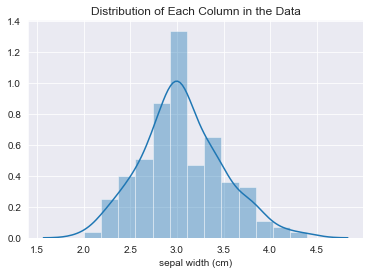

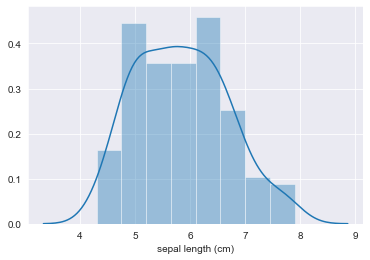

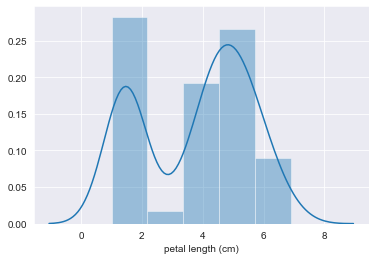

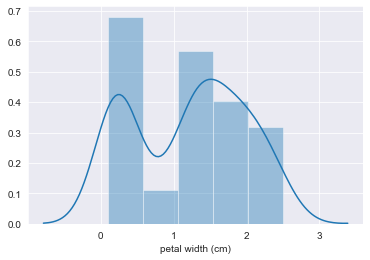

In [9]:
sns.set_style('darkgrid')
plt.title('Distribution of Each Column in the Data')

for i,col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(X[col])
    

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
explained_variance = pca.explained_variance_

In [31]:
explained_variance

array([2.91347703, 0.9670209 , 0.1345405 , 0.01857502])

In [32]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.72229951, 0.2397406 , 0.03335483, 0.00460506])

Text(0, 0.5, 'Variance Explained')

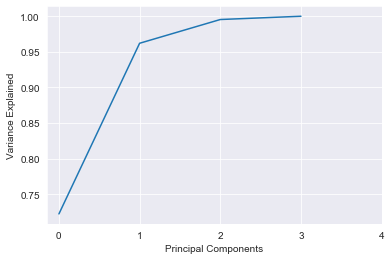

In [33]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.xticks((np.arange(0,5,1)))
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

## Observation

It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset. Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set is captured by the first two principal components

Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:

In [34]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
print('Accuracy :')
print(accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix is :')
print(confusion_matrix(y_test,y_pred))
print('/n')
print("Classification Matrix is :")
print(classification_report(y_test,y_pred))

Accuracy :
0.9333333333333333


Confusion Matrix is :
[[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
/n
Classification Matrix is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30

